# Projet numérique de Probabilités 

CLODION Sandra, ROSSI Sophie

# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

**Question 1**

On applique la Loi forte des grands nombres aux variables aléatoires conditionnelles.

Soient $(li)_{i})$ une suite de variables iid suivant la loi $\mathbb{P}_{L|Z(x_{j_{1}}) = z(x_{j_{1}}), \dots, Z(x_{j_{n}}) = z(x_{j_{n}}) }$ et telles que $E[L_{i}] = E[L|Z(x_{j_{1}}) = z(x_{j_{1}}), \dots, Z(x_{j_{n}}) = z(x_{j_{n}})] < \infty$

Alors, d'après la loi forte des grands nombres $L^{1}$ (et par la formule de l'espérance itérée), on a la convergence presque sure:
$$ \frac{\sum_{k=1}^K l_{k}}{K} \underset{K\to +\infty}{\longrightarrow} L$$

**Question 2**

Il y a $N$ points de discrétisation sur le segment [AB] dont $n$ sont des points d'observation.

$Z=(Z(x_0),\dots,Z(x_N))$ est le vecteur aléatoire donnant la profondeur à tous les points de discrétisation.

On réordonne les composantes de $Z$ de sorte que l'on ait les composantes correspondant aux sites d'observation à la fin *ie* 

$$Z=(Z(x_{0}),\dots,Z(x_{N}),Z(x_{j_{1}}),\dots,Z(x_{j_{n}}))$$
On nomme $Z_{i}$ le vecteur des $N-n$ premières composantes de $Z$ et $Z_{o}$ le vecteur des $n$ dernières *ie* $Z_{o} = (Z(x_{j_{1}}),\dots,Z(x_{j_{n}}))$, de sorte que $Z = (Z_{i}, Z_{o})$.

Alors, la loi conditionnelle du vecteur des composantes de $Z$ correspondant aux points de discrétisation sans observation, sachant les valeurs prises par les composantes aux sites d'observation est la loi de $Z_{i}$ sachant $Z_{o}$.

D'après le cours Probabilités IV:
$$Z_{i} |Z_{o} \text{  suit la loi  } \mathcal{N}(m_{Z_{i}|Z_{o} = z_{o}}, CS_{Z_{i}})$$ où:
+ $m_{Z_{i}|Z_{o} = z_{o}} = m_{Z_{i}} + C_{Z_{i}, Z_{o}}C_{Z_{o}}^{-1}(z_{o} - m_{Z_{o}})$ l'espérance, avec :
    + $C_{Z_{i}} = Cov(Z_{i}, Z_{i})$
    + $C_{Z_{i}, Z_{o}} = Cov(Z_{i}, Z_{o})$
    + $C_{Z_{o}} = Cov (Z_{o}, Z_{o})$
+ $CS_{Z_{i}} = C_{Z_{i}} - C_{Z_{i}, Z_{o}}C_{Z_{o}}^{-1}C_{Z_{o}, Z_{i}}$ la covariance conditionnelle

**Question 3**

Soit $Y=(Y_1,\dots,Y_p)$ un vecteur de composantes gaussiennes centrées réduites indépendantes.

Soient $R$ une matrice de taille $p\times p$ et $m$ est un vecteur de taille $p$.

Montrons que $Z=m+R\mathbf{Y}$ suit une loi $\mathcal{N}(m, RR^{T})$.

$Y$ est un vecteur gaussien car toute combinaison linéaire de gaussiennes indépendantes est une gaussienne. Y suit $\mathcal{N} (0_{p}, I_{p})$

De meme, $Z$ est gaussien: en effet, soit $\eta$ de taille $p$ alors $<\eta,Z> = <\eta,m> + (R^{T}\eta)Y$ est gaussienne par définition.

Or $Z$ gaussien si et seulement si sa loi est gaussienne. Donc $Z$ est uniquement caractérisé par sa matrice de covariance et son espérance.

Soit $\phi_{Y}$ la fonction caractéristique de $Y$ *ie* $\phi_{Y}(x)= exp(\frac{-x^{T}x}{2})$. Alors:

\begin{align}
\phi_{Z}(x) & = E[exp(i<x,Z>)] \\
& = exp(i<x,m>)E[exp(i<x,RY>)]\\
& = exp(i<x,m>)E[exp(i<R^{T}x,Y>)]\\
& = exp(i<x,m>)\phi_{Y}(R^{T}x)\\
& = exp(i<x,m> - \frac{1}{2}x^{T}RR^{T}x)
\end{align}

On reconnait bien la fonction caractéristique de la loi $\mathcal{N}(m, RR^{T})$.

Donc $Z$ suit la loi $\mathcal{N}(m, RR^{T})$.

**Question 4**

Algorithme de simulation conditionnelle:

1. simuler $N-n$ variables iid $\mathcal{N}(0,1)$ notées $Y_{1}, \dots, Y_{N-n}$ et créer le vecteur $Y = (Y_{1}, \dots, Y_{N-n})$
2. calculer la matrice de Cholesky $L$ telle que $LL^{T}= CS_{Z_{i}}$
3. calculer $Z_{i} = m_{Z_{i}|Z_{o} = z_{o}} + LY$

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [1]:
# imports
from math import *
import scipy.stats as sps
import scipy as spy

In [2]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


## Questions

### 1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [3]:
def C(d, a, sigma2): # d est positive, c'est une distance
    return sigma2 * np.exp(-(d/a))

def covariance(M_d, a, sigma2): # M_d est la matrice des distances
    nl, nc = np.shape(M_d)
    M_c = np.zeros((nl, nc)) # M_c est la matrice des covariances
    for l in range(nl):
        for c in range(nc):
            el = M_d[l, c]
            cov = C(el, a, sigma2)
            M_c[l, c] = cov
    return M_c

### 2. Calculer la matrice de distance.

In [4]:
def matrice_distance(x, z): 
    l = len(x)
    c = len(z)
    M = np.zeros((l, c))
    for i in range(l):
        for j in range(c):
            d = np.sqrt((x[i]-z[j])**2)
            M[i, j] = d
    return M

In [5]:
M_d = matrice_distance(discretization, discretization)
M_d

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

### 3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [6]:
M_d = matrice_distance(discretization, discretization)
C_Z = covariance(M_d, a, sigma2)
C_Z

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

### 4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [7]:
inconnues = np.array([discretization[i] for i in unknown_indexes])
obs = np.array([discretization[i] for i in observation_indexes])

In [8]:
# On prend les notations des questions théoriques

# entre les observations
M_Zo = matrice_distance(obs, obs) # où Zo sont les composantes observées de Z
C_Zo = covariance(M_Zo, a, sigma2) # où Zi sont les composantes inconnues de Z

# entre les observations et les inconnues
M_Zi_Zo = matrice_distance(inconnues, obs)
C_Zi_Zo = covariance(M_Zi_Zo, a, sigma2)

M_Zo_Zi = matrice_distance(obs, inconnues)
C_Zo_Zi = covariance(M_Zo_Zi, a, sigma2)

# entre les inconnues
M_Zi = matrice_distance(inconnues, inconnues)
C_Zi = covariance(M_Zi, a, sigma2)

### 5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [9]:
m_Zo = np.array([mu for i in range(len(obs))]) 
m_Zi = np.array([mu for i in range(len(inconnues))])

# on note m_c l'espérance conditionnelle cherchée : 
# elle est donnée par la formule des vecteurs gaussiens conditionnels (cf question théorique 2)
C_Zo_inv = np.linalg.inv(C_Zo)
C = np.dot(C_Zi_Zo, C_Zo_inv)
m_c = m_Zi + np.dot(C, depth - m_Zo)
m_c

array([ -0.46688335,  -0.88839774,  -1.26876184,  -1.61178245,
        -1.92089264,  -2.19918609,  -2.44944805,  -2.67418323,
        -2.87564085,  -3.05583718,  -3.21657567,  -3.35946505,
        -3.4859354 ,  -3.59725249,  -3.69453041,  -3.77874275,
        -3.85073233,  -3.91121966,  -3.96081011,  -4.31432093,
        -4.62177936,  -4.92545243,  -5.2283794 ,  -5.53359206,
        -5.8441451 ,  -6.16314662,  -6.49378931,  -6.83938234,
        -7.20338453,  -7.58943893,  -8.00140931,  -8.4434188 ,
        -8.91989118,  -9.43559515,  -9.99569205, -10.60578751,
       -11.27198758, -12.00095981, -11.91810571, -11.10545015,
       -10.35389999,  -9.65593346,  -9.00456508,  -8.39327573,
        -7.81594742,  -7.26680206,  -6.74034362,  -6.23130312,
        -5.73458592,  -5.2452207 ,  -4.75830973,  -4.26897984,
        -3.77233366,  -3.26340058,  -2.73708703,  -2.18812549,
        -1.61102176,  -1.43702815,  -1.83839689,  -2.20812324,
        -2.54990754,  -2.8671705 ,  -3.16308739,  -3.44

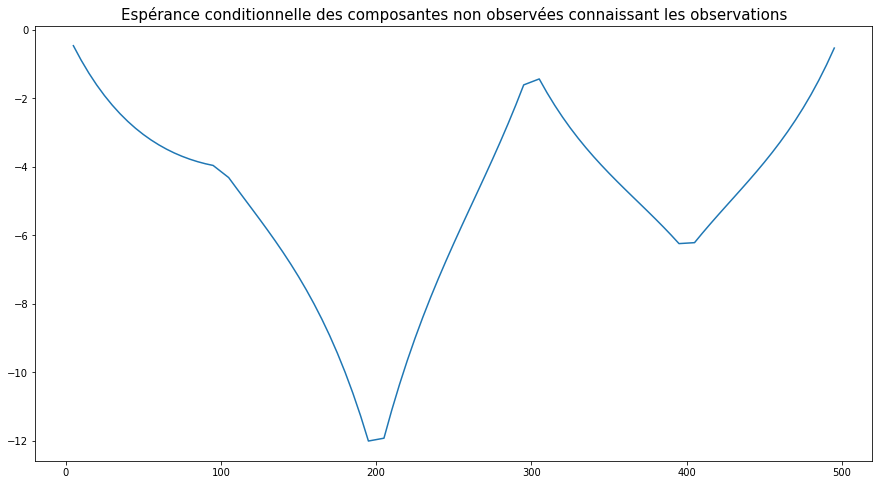

In [10]:
# allure de la courbe des profondeurs estimée avec l'espérance conditionnelle
plt.figure(figsize= (15, 8))
plt.plot(inconnues, m_c, label = "composantes inconnues")
plt.title("Espérance conditionnelle des composantes non observées connaissant les observations", size = 15)
plt.show()

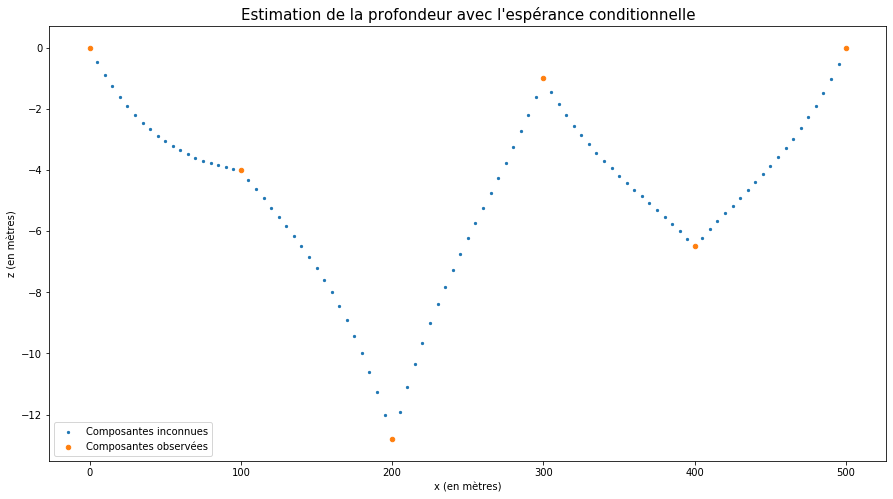

In [11]:
plt.figure(figsize= (15, 8))
plt.scatter(inconnues, m_c, s=5, label="Composantes inconnues")
plt.scatter(obs, depth, s=20, label="Composantes observées")
plt.legend()
plt.title("Estimation de la profondeur avec l'espérance conditionnelle", size=15)
plt.xlabel("x (en mètres)")
plt.ylabel("z (en mètres)")
plt.show()

### 6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [12]:
# on note CS la matrice voulue:
# elle est donnée par la formule des vecteurs gaussiens conditionnels (cf question théorique 2)

C = np.dot(C_Zi_Zo, C_Zo_inv)
C = np.dot(C, C_Zo_Zi)
CS = C_Zi - C
CS



array([[ 2.16624554e+00,  1.95016959e+00,  1.75361159e+00, ...,
         6.50521303e-19,  1.51788304e-18,  5.42101086e-19],
       [ 1.95016959e+00,  3.91985713e+00,  3.52477392e+00, ...,
         2.16840434e-19,  1.19262239e-18,  1.40946282e-18],
       [ 1.75361159e+00,  3.52477392e+00,  5.33121337e+00, ...,
        -8.67361738e-19, -1.08420217e-19,  2.16840434e-19],
       ...,
       [ 1.08420217e-19, -2.16840434e-19, -1.08420217e-18, ...,
         5.33121337e+00,  3.52477392e+00,  1.75361159e+00],
       [ 7.58941521e-19,  4.33680869e-19, -4.33680869e-19, ...,
         3.52477392e+00,  3.91985713e+00,  1.95016959e+00],
       [ 0.00000000e+00,  9.75781955e-19,  1.08420217e-19, ...,
         1.75361159e+00,  1.95016959e+00,  2.16624554e+00]])

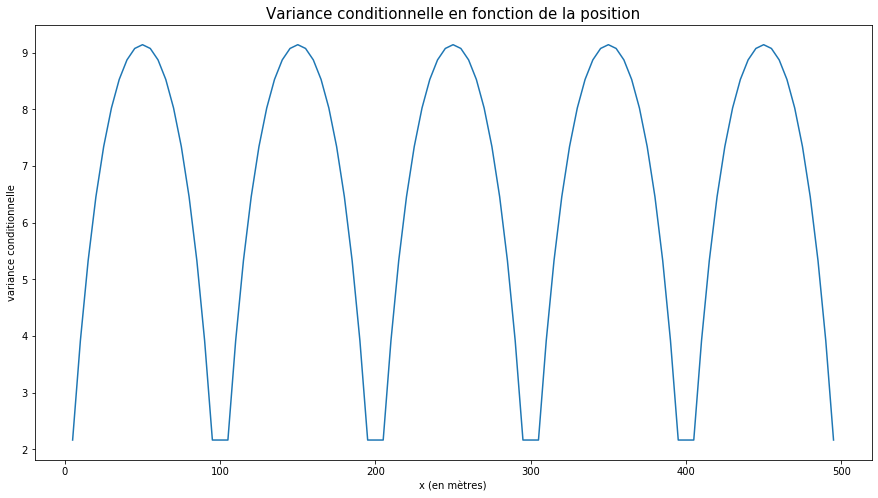

In [13]:
diag = [CS[i][i] for i in range(95)]

plt.figure(figsize= (15, 8))
plt.plot(inconnues, diag)
plt.title("Variance conditionnelle en fonction de la position", size=15)
plt.xlabel("x (en mètres)")
plt.ylabel("variance conditionnelle")
plt.show()

#### Observations

On observe que la variance conditionnelle est périodique et est minimale autour des points d'observation.

La variance quantifie l'écart à la moyenne. 
Ainsi, le fait que la variance soit minimale aux points d'observation est cohérent car, comme il s'agit de composantes connues, il n'y a donc pas de fluctuations considérables autour de ces dernières. De plus, elle est périodique car les composantes inconnues sont *iid* et intercalées régulièrement d'une composantes connue.

### 7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

In [14]:
def simulation_conditionnelle():
    # simulation de N-n = 95 variables iid centrées réduites:
    Y = np.random.normal(0, 1, 95)

    # calcul de la matrice de Cholesky:
    L = np.linalg.cholesky(CS)

    # simulation conditionnelle:
    Zi = m_c + np.dot(L, Y)
    return Zi

# reconstitution de tout Z
def all_Z(depth, observation_indexes):
    Z =np.array([0 for i in range(N)])
    depth_provisoire = depth
    Zi = simulation_conditionnelle()
    for i in range(N):
        if i in observation_indexes:
            Z[i] = depth_provisoire[0]
            depth_provisoire = np.delete(depth_provisoire, 0)
        else: # i in unknown_indexes
            if i<20:
                Z[i] = Zi[i-1] 
            elif 20<= i <40:
                Z[i] = Zi[i-2]
            elif 40<= i <60:
                Z[i] = Zi[i-3]
            elif 60<= i <80:
                Z[i] = Zi[i-4]
            elif 80<= i <100:
                Z[i] = Zi[i-5]
    return Z

Z = all_Z(depth, observation_indexes)

In [15]:
list_esp = list(m_c)
for i in range(6):
    list_esp.insert(i*20, depth[i])
esp=np.array(list_esp)
esp # vecteur espérance total (composantes conditionnelles et composantes observées)

array([  0.        ,  -0.46688335,  -0.88839774,  -1.26876184,
        -1.61178245,  -1.92089264,  -2.19918609,  -2.44944805,
        -2.67418323,  -2.87564085,  -3.05583718,  -3.21657567,
        -3.35946505,  -3.4859354 ,  -3.59725249,  -3.69453041,
        -3.77874275,  -3.85073233,  -3.91121966,  -3.96081011,
        -4.        ,  -4.31432093,  -4.62177936,  -4.92545243,
        -5.2283794 ,  -5.53359206,  -5.8441451 ,  -6.16314662,
        -6.49378931,  -6.83938234,  -7.20338453,  -7.58943893,
        -8.00140931,  -8.4434188 ,  -8.91989118,  -9.43559515,
        -9.99569205, -10.60578751, -11.27198758, -12.00095981,
       -12.8       , -11.91810571, -11.10545015, -10.35389999,
        -9.65593346,  -9.00456508,  -8.39327573,  -7.81594742,
        -7.26680206,  -6.74034362,  -6.23130312,  -5.73458592,
        -5.2452207 ,  -4.75830973,  -4.26897984,  -3.77233366,
        -3.26340058,  -2.73708703,  -2.18812549,  -1.61102176,
        -1.        ,  -1.43702815,  -1.83839689,  -2.20

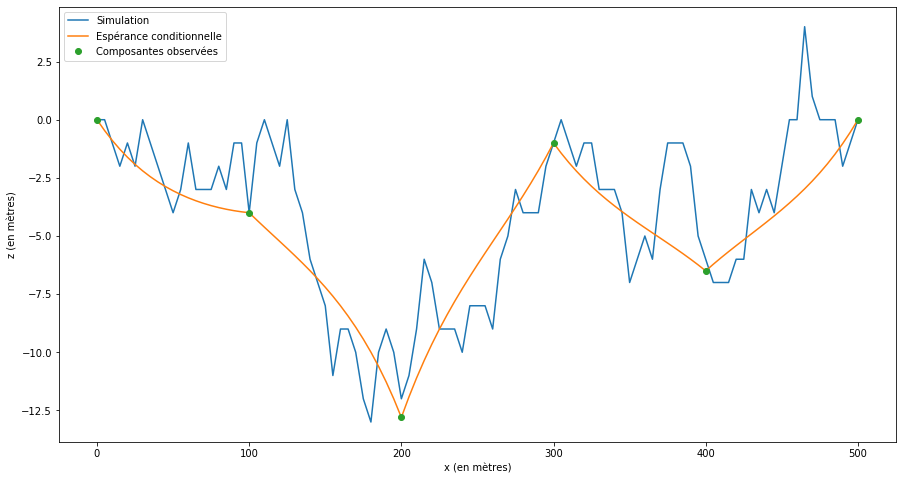

In [22]:
plt.figure(figsize= (15, 8))
plt.plot(discretization, Z, label="Simulation")
plt.plot(discretization, esp, label="Espérance conditionnelle")
observation_x = [Delta*i for i in observation_indexes]
plt.plot(observation_x, depth, "o", label="Composantes observées")
plt.legend()
plt.xlabel("x (en mètres)")
plt.ylabel("z (en mètres)")
plt.show()

#### Analyse des résultats

On observe que la courbe de l'espérance conditionnelle est bien plus lisse que celle obtenue par la simulation conditionnelle. 


En effet, l'espérance conditionnelle est un premier estimateur des profondeurs, mais pas particulièrement qualitatif ni optimal (cf question 8). Ainsi, la courbe que l'on obtient est moins précise que celle obtenue par la simulation conditionnelle: elle donne juste une "idée" de l'allure du fond marin. 

Par contre, les profondeurs obtenues par la simulation conditionnelle fluctuent davantage et offrent donc un paysage plus "réaliste" du fond marin étudié. En effet, on ne se contente plus d'approximer la profondeur en chaque point par de la simple moyenne (meme si conditionnelle). 

### 8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [23]:
def cable_length(Z, delta):
    length = 0
    for i in range(1, N):
        length += np.sqrt(delta**2 + (Z[i]-Z[i-1])**2)
    return length

### 9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [24]:
def estimation_L(K):
    estimator = 0
    lengths = []
    for i in range(K):
        li = cable_length(all_Z(depth, observation_indexes), Delta)
        estimator += li
        lengths.append(li)
    return estimator/K, lengths

estimator, lengths = estimation_L(100)

print(f"L'espérence conditionnelle de la longueur de câble est de {round(estimator, 2)} mètres")

L'espérence conditionnelle de la longueur de câble est de 522.22 mètres


In [25]:
print(f"La longueur de l'espérence conditionnelle est de {round(cable_length(esp, Delta), 2)} mètres")

La longueur de l'espérence conditionnelle est de 501.65 mètres


#### Analyse des résultats

On remarque que l'espérance conditionnelle (estimée) de la longueur est strictement supérieure à la longueur de l'espérance conditionnelle. Et donc, l'espérance de la longueur ne coincide pas avec la longueur de l'espérance. En effet, la fonction $l$ n'est pas linéaire en ses variables. 

On remarque bien ce biais sur le graphique de la question 8: l'allure de la profondeur correspondant à l'espérance conditionnelle est bien plus lisse que celle correspondant aux simulations conditionnelles. Celles-ci offrent donc une estimation plus fine et précise de la courbe des profondeurs réelle. 

Les simulations conditionnelles donnent donc un estimateur bien plus qualitatif que l'espérance conditionnelle seule (qui ne rend pas bien compte des fluctuations).

### 10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

In [28]:
liste_ln = [2, 2.5, 3, 3.5, 4, 4.5, 4.7, 5]
nbr_simulations = [int(10**(x)) for x in liste_ln]
Mn = []
for K in nbr_simulations:
    Mn.append(estimation_L(K)[0])

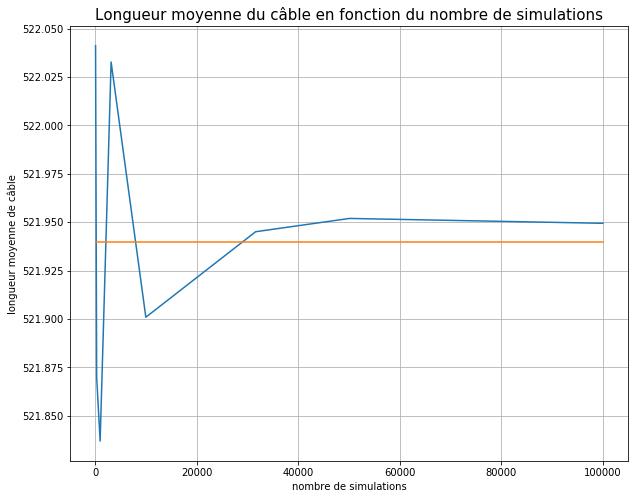

In [29]:
plt.figure(figsize= (10, 8))
plt.plot(nbr_simulations, Mn)
plt.plot(nbr_simulations, [521.94]*len(nbr_simulations))
plt.grid()
plt.title("Longueur moyenne du câble en fonction du nombre de simulations", size=15)
plt.xlabel("nombre de simulations")
plt.ylabel("longueur moyenne de câble")
plt.show()

#### Analyse des résultats
On observe que plus le nombre de simulations et grand, et plus l'estimateur va converger vers une certaine valeur (environ 521,94). Cette convergence, qui illustre bien la loi des grands nombres (cf question 1), donne donc une approximation de la "vraie" longueur du cable $L$.

On remarque de plus que cette valeur asymptotique est bien supérieure à 500 (qui est généralement l'ordre de grandeur de la longueur de l'espérance conditionnelle). Ceci confirme bien que l'espérance conditionnelle seule n'est pas, dans ce cas un bon estimateur des profondeurs à utiliser dans le calcul de la longueur du cable.

### 11. Représenter l'histogramme des longueurs de câbles générées.

In [107]:
lengths = estimation_L(100)[1]

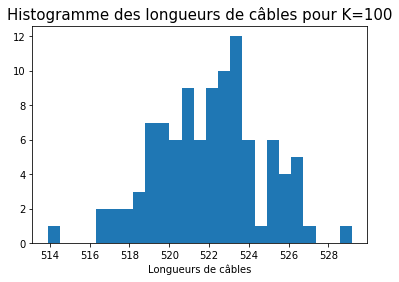

In [108]:
plt.hist(lengths, bins = 25)
plt.xlabel("Longueurs de câbles")
plt.title("Histogramme des longueurs de câbles pour K=100", size=15)
plt.show()

### 12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

**Méthode 1: avec le Théorème Central Limite (TCL)** 

En reprenant les hypothèses de la question théorique 1 et étant donné que les $(l_{k})_{k}$ sont *iid* et dans $L^{2}$ (d'espérance $m$ et de variance $\sigma^{2}$), on peut y appliquer le TCL:

$$ \frac{\sqrt{K}}{\sigma}(\frac{\sum_{k=1}^K l_{k}}{K} - m) \overset{\mathcal{L}}{\underset{K\to +\infty}{\longrightarrow}} \mathcal{N}(0,1)$$

On note I l'intervalle cherché et X la variable correspondant à la loi limite $\mathcal{N}(0,1)$.
Donc, asymptotiquement (*ie* pour $K$ suffisamment grand): 

$$ \begin{align}
& \mathbb{P}(\frac{\sqrt{K}}{\sigma}(\frac{\sum_{k=1}^K l_{k}}{K} - m) \in I) = 0.95  \\
\iff & \mathbb{P}(X \in I) = 0.95 \\
\iff & I = [q_{0.05/2}, q_{1-0.05/2}] \text{   où les q sont les quantiles de la loi normale centrée réduite} \\
\iff & I = [\pm q] \text{   par symétrie de la loi, et q vaut environ 1.96}
\end{align}
$$


Donc: 


$$ \begin{align}
& \mathbb{P}(\frac{\sqrt{K}}{\sigma}(\frac{\sum_{k=1}^K l_{k}}{K} - m) \in I) = 0.95  \\
\iff & \mathbb{P}( \frac{\sum_{k=1}^K l_{k}}{K} \in \left[{m}-1,96{\frac {\sigma}{\sqrt {K}}} ; {m}+1,96{\frac {\sigma}{\sqrt {K}}}\right]) = 0.95 \\
\end{align}
$$

L'intervalle de confiance asymptotique à 95% de la longueur du cable est finalement: 

$${\displaystyle \left[{m}-1,96{\frac {\sigma}{\sqrt {K}}} ; {m}+1,96{\frac {\sigma}{\sqrt {K}}}\right]}$$ où:
+ $m$ est la moyenne des longueurs de câbles simulées
+ $\sigma$ est l'écart-type observé
+ ${K}$ est le nombre de simulations effectuées



In [127]:
# Méthode 1: TCL où les données manquantes sont calculées par scipy 

# sem calcule un écart type à partir des données
# mean calcule une moyenne à partir des données
# norm.ppf(1-a) donne le quantile d'ordre a de la loi normale centrée réduite

# à partir de cela on construit l'intervalle de confiance donnée par le TCL

def conf_interval_1(lengths):
    alpha = 0.05
    q = sps.norm.ppf(1-alpha/2)
    mean = spy.mean(lengths)
    std_err = sps.sem(lengths)
    K = len(lengths)
    return mean - (std_err/sqrt(K))*q, mean + (std_err/sqrt(K))*q

a, b = conf_interval_1(lengths)
a, b

(521.9887367953289, 522.0937051253292)

In [128]:
"""
NB: au lieu d'utiliser les fonctions de scipy on peut construire nous-memes les estimateurs sans biais de 
l'espérance et de la variance.
Il suffit ensuite de remplacer mean par moy_empirique et std_err par sqrt(variance_empirique) dans la fonction 
conf_interval_1.
On obtient, dans ce cas, des résultats très proches de ceux ci-dessus. 
"""
def moy_empirique(L):
    s = 0
    for el in L:
        s += el
    return s/len(L)

def variance_empirique(L):
    m = moy_empirique(L)
    v = 0
    for el in L:
        v += (el - m)**2
    return v/(len(L)-1)

**Méthode 2**

On utilise une méthode plus naïve, qui fonctionne de la manière suivante :
- on trie la liste des longueurs simulées
- on calcule la moyenne des valeurs de cette liste
- on va supprimer de la liste 5% des valeurs, en supprimant à chaque itération la valeur la plus éloignée de la moyenne (soit la première valeur de la liste, soit la dernière)
- on note t le maximum de l'écart à la moyenne entre la première et la dernière valeur de la liste
- l'intervalle souhaité est ainsi (moyenne-t, moyenne+t)

In [111]:
def conf_interval_2(lengths):
    lengths_copy = lengths.copy()
    lengths_copy.sort()
    K = len(lengths_copy)
    moyenne=np.mean(lengths_copy)
    for j in range(int(5*K/100)):
        if abs(lengths_copy[0]-moyenne)>abs(lengths_copy[-1]-moyenne):
            lengths_copy.pop(0)
        else :
            lengths_copy.pop()
    t=max(moyenne-lengths_copy[0],lengths_copy[-1]-moyenne)
    return moyenne-t, moyenne+t #l'intervalle est bien centré autour de la moyenne

a, b = conf_interval_2(lengths)
print ((a,b))

(517.4142236894445, 526.6682182312136)


Text(0.5, 1.0, 'Intervalle de confiance à 95% de la longueur du cable (pour K = 100)')

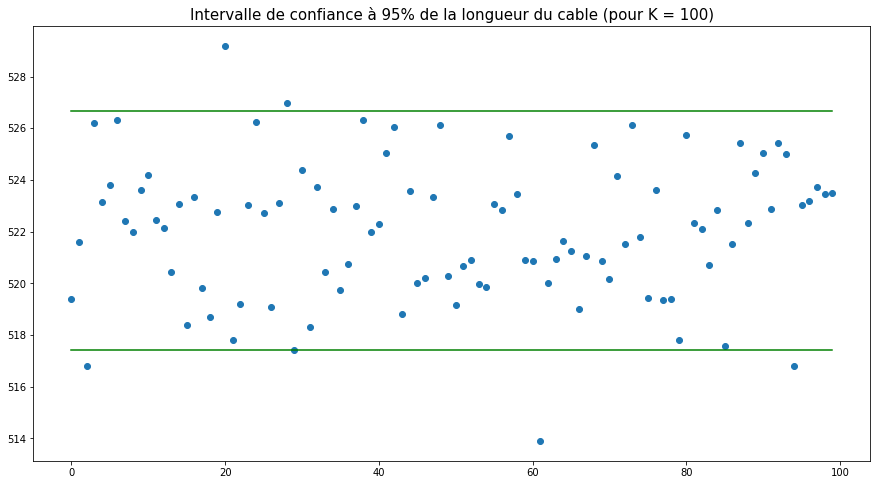

In [124]:
plt.figure(figsize = (15, 8))
plt.plot(lengths, "o")
plt.plot([i for i in range(100)], [a for i in range(100)], "green")
plt.plot([i for i in range(100)], [b for i in range(100)], "green")
plt.title("Intervalle de confiance à 95% de la longueur du cable (pour K = 100)", size = 15)

#### Comparaison des intervalles

La méthode avec le TCL donne un intervalle très fin, bien plus fin que celui trouvé avec une approche plus naive. 

Or, on peut notamment expliquer ce biais non négligeable par la petite taille de l'échantillon (K = 100). En effet le TCL donne un intervalle de confiance asymptotique, c'est-à-dire qu'il devient fiable lorsque K s'approche de l'infini (la vitesse de convergence étant en sqrt(K)). Ainsi, pour des K petits, l'intervalle est trop petit et ne reflète pas du tout les résultats des simulations.

Par contre, comme dans le second cas, on considère les simulations comme des réalisations de la loi de la longueur du cable, et que l'intervalle est construit à partir de ces dernières, l'intervalle obtenu est donc cohérent avec les simulations.

### 13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [129]:
def proba_over(l, lengths):
    K = len(lengths)
    lengths_copy = lengths.copy()
    lengths_copy.sort()
    i = 0
    while lengths_copy[i]<525:
        i+=1
    return (K-i)/K

proba = proba_over(525, lengths)
print(f"La probabilité d'avoir un cable plus long que 525 m est de {proba}")

La probabilité d'avoir un cable plus long que 525 m est de 0.16


### 14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

### Pour 1000 simulations (K=1000)

In [62]:
lengths = estimation_L(1000)[1]

**Histogramme des longueurs de câbles générées**

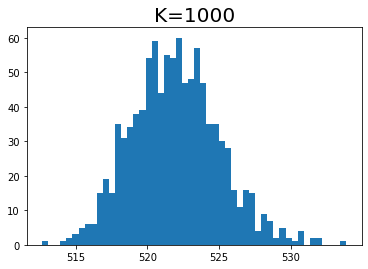

In [63]:
plt.hist(lengths, bins = 50)
plt.title("K=1000", size=20)
plt.show()

**Intervalle de confiance à 95% de la longueur du câble**

***Méthode 1***

In [64]:
a, b = conf_interval_1(lengths)
print("L'intervalle de confiance (avec le TCL) est: [", a, " , ", b, "]")

L'intervalle de confiance (avec le TCL) est: [ 521.9573490235279  ,  521.958552340691 ]


***Méthode 2***

In [65]:
a, b = conf_interval_2(lengths)
print("L'intervalle de confiance (naïf) est: [", a, " , ", b, "]")

L'intervalle de confiance (naïf) est: [ 515.9669381829187  ,  527.9489631813001 ]


**Probabilité que la longueur du câble dépasse 525 mètres**

In [66]:
p = proba_over(525, lengths)
print("La proba d'avoir un cable plus long que 525 m est de", p )

La proba d'avoir un cable plus long que 525 m est de 0.153


### Pour 10 000 simulations (K=10000)

In [67]:
lengths = estimation_L(10000)[1]

**Histogramme des longueurs de câbles générées**

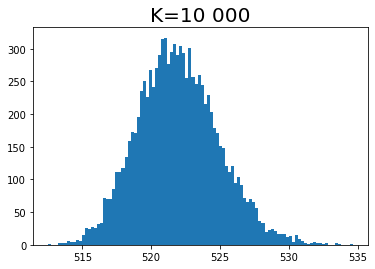

In [68]:
plt.hist(lengths, bins = 100)
plt.title("K=10 000", size=20)
plt.show()

**Intervalle de confiance à 95% de la longueur du câble**

***Méthode 1***

In [69]:
a, b = conf_interval_1(lengths)
print("L'intervalle de confiance (avec le TCL) est: [", a, " , ", b, "]")

L'intervalle de confiance (avec le TCL) est: [ 521.9684192939955  ,  521.9687851894379 ]


***Méthode 2***

In [70]:
a, b = conf_interval_2(lengths)
print("L'intervalle de confiance (naïf) est: [", a, " , ", b, "]")

L'intervalle de confiance (naïf) est: [ 516.2707867627295  ,  527.6664177207039 ]


**Probabilité que la longueur du câble dépasse 525 mètres**

In [71]:
p = proba_over(525, lengths)
print("La proba d'avoir un cable plus long que 525 m est de", p )

La proba d'avoir un cable plus long que 525 m est de 0.15


### Pour 100 000 simulations (K=100000)

In [72]:
lengths = estimation_L(100000)[1]

**Histogramme des longueurs de câbles générées**

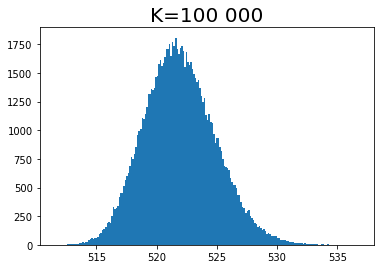

In [73]:
plt.hist(lengths, bins = 200)
plt.title("K=100 000", size=20)
plt.show()

**Intervalle de confiance à 95% de la longueur du câble**

***Méthode 1***

In [74]:
a, b = conf_interval_1(lengths)
print("L'intervalle de confiance est: [", a, " , ", b, "]")

L'intervalle de confiance est: [ 521.9343840657328  ,  521.9344995826267 ]


***Méthode 2***

In [84]:
a, b = conf_interval_2(lengths)
print("L'intervalle de confiance (naïf) est: [", a, " , ", b, "]")

L'intervalle de confiance (naïf) est: [ 516.203882723267  ,  527.6650009250925 ]


**Probabilité que la longueur du câble dépasse 525 mètres**

In [76]:
p = proba_over(525, lengths)
print("La proba d'avoir un cable plus long que 525 m est de", p )

La proba d'avoir un cable plus long que 525 m est de 0.15028


### Commentaire

On observe tout d'abord que la probabilité que la longueur du cable soit supérieure à 525 m est toujours de l'ordre de 0.15, qu'elle soit calculée avec K = 100, 1000 ou 10 000. Ceci est bien cohérent avec le graphique à la question 10 qui montrait que la longueur du cable converge vers 522 m environ, et que donc la probabilité de dépasser 525 m ne doit pas etre trop élevée.

De meme, la taille des intervalles (calculés avec la méthode 1 ou 2) ne varie pas considérablement lorsqu'on multiplie par 100 la taille de l'échantillon: ils restent du meme ordre de grandeur. 

Enfin, les histogrammes donnent une représentation visuelle de la loi de la longueur du cable, qui, en première approximation semble etre une gaussienne centrée autour de la valeur limite. Ceci peut expliquer la variation lente des intervalles et de la probabilité de dépasser 525 m car la queue de distribution de la gaussienne décroit très rapidement.